Model execution on own collected data from youtube.Not that data collected by other teams.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
random_file_name = "/content/drive/MyDrive/New_indexes_mp3/Dohori_141.mp3"

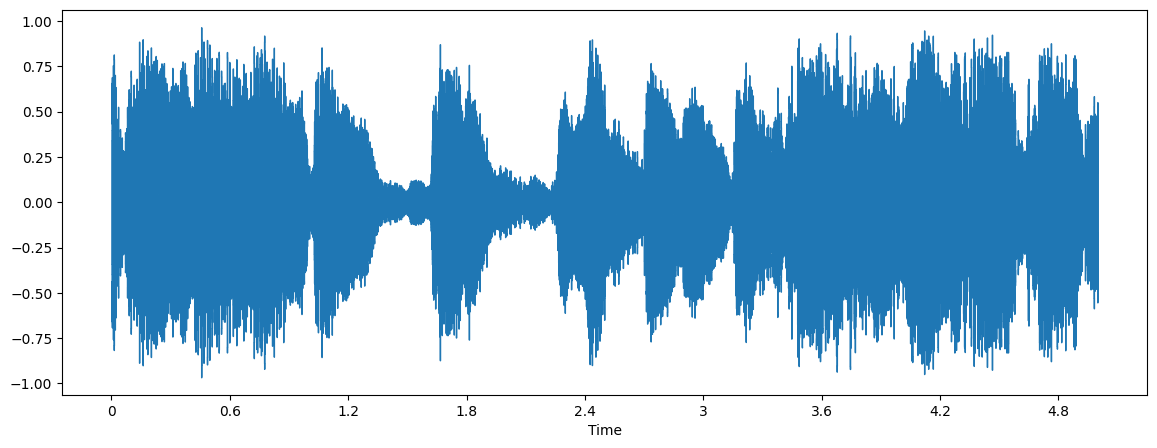

In [ ]:
y,sr = librosa.load(random_file_name,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

In [ ]:
y.shape

(220500,)

In [ ]:
from IPython.display import Audio
Audio(data=y,rate=sr)

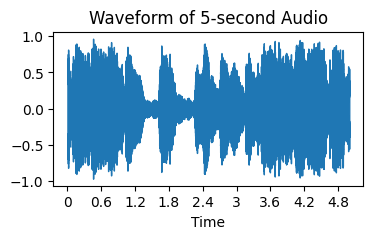

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to your 5-second audio file
audio_path = "/content/drive/MyDrive/New_indexes_mp3/Dohori_141.mp3"

# Load the audio file
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Since the audio is 5 seconds long, process it as a single chunk
plt.figure(figsize=(4, 2))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of 5-second Audio")
plt.show()

In [ ]:
#Plotting Melspectrogram of Entire Audio
def plot_melespectrogram(y,sr):
    #Compute spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()

In [ ]:
random_file_name = "/content/drive/MyDrive/New_indexes_mp3/Dohori_141.mp3"
y,sr = librosa.load(random_file_name,sr=44100)

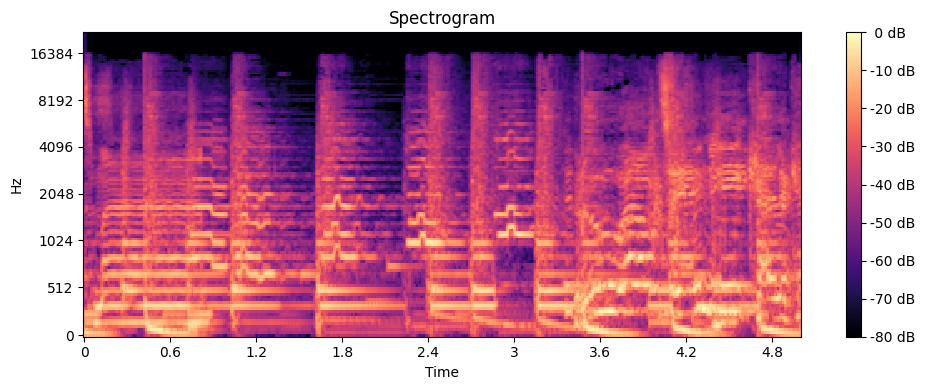

In [ ]:
plot_melespectrogram(y,sr)


In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.image import resize
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define your folder structure
data_dir = "/content/drive/MyDrive/New_indexes_mp3"  # Directory containing all .mp3 files
classes = ['Dohori', 'Gazal', 'Hip Hop', 'Lok Bhajan', 'Newari']  # List of genres

# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    # Iterate over all files in the directory
    for filename in os.listdir(data_dir):
        if filename.endswith('.mp3'):
            # Extract genre from the filename (e.g., "Dohori_1.mp3" -> "Dohori")
            genre = filename.split('_')[0]

            # Check if the genre is in the classes list
            if genre in classes:
                file_path = os.path.join(data_dir, filename)
                audio_data, sample_rate = librosa.load(file_path, sr=None)

                # Generate Mel Spectrogram for the entire 5-second audio
                mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

                # Resize the Mel Spectrogram to the target shape
                mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)

                # Append data and labels to lists
                data.append(mel_spectrogram.numpy())  # Convert to numpy array
                labels.append(classes.index(genre))  # Use the index of the genre as the label

    # Convert lists to numpy arrays
    data = np.array(data)
    labels = np.array(labels)

    return data, labels

# Load and preprocess the data
data, labels = load_and_preprocess_data(data_dir, classes)

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=len(classes))

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.2, random_state=42)



In [ ]:
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

In [ ]:
# Define a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 1)),  # Input shape for Mel Spectrogram
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,909,265 (121.72 MB)

 Trainable params: 10,636,421 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,272,844 (81.15 MB)

In [ ]:
# Train the model
model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.3593 - loss: 71.8216 - val_accuracy: 0.6130 - val_loss: 0.9555
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.7622 - loss: 0.6942 - val_accuracy: 0.7930 - val_loss: 0.5807
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9413 - loss: 0.2079 - val_accuracy: 0.8594 - val_loss: 0.5112
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9786 - loss: 0.0752 - val_accuracy: 0.8246 - val_loss: 0.7184
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9906 - loss: 0.0469 - val_accuracy: 0.8373 - val_loss: 0.7260


In [ ]:
model.save("/content/drive/MyDrive/best_music_CNN.h5")

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 452ms/step


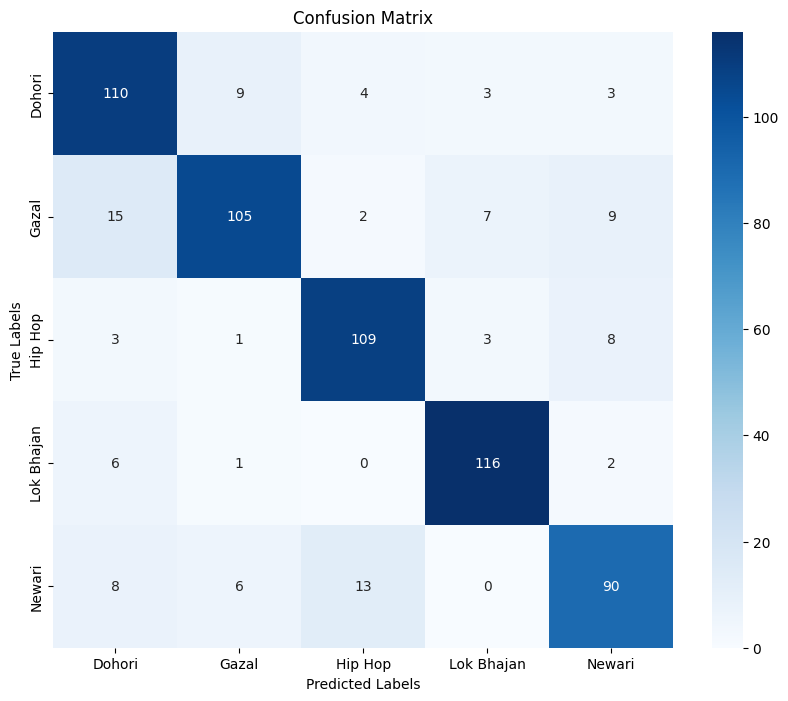

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to generate predictions for the test dataset
def generate_predictions(model, X_test):
    """
    Generates predictions for the test dataset.
    :param model: Trained model.
    :param X_test: Test data (Mel spectrograms).
    :return: Predicted class indices.
    """
    predictions = model.predict(X_test)
    predicted_class_indices = np.argmax(predictions, axis=1)
    return predicted_class_indices

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots the confusion matrix.
    :param y_true: True labels.
    :param y_pred: Predicted labels.
    :param classes: List of class names.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Generate predictions for the test dataset
y_pred = generate_predictions(model, X_test)

# Convert one-hot encoded labels back to class indices
y_true = np.argmax(Y_test, axis=1)

# Plot the confusion matrix
plot_confusion_matrix(y_true, y_pred, classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
Predicted Genre: Dohori

Prediction Probabilities:
Dohori: 0.9999
Gazal: 0.0001
Hip Hop: 0.0000
Lok Bhajan: 0.0000
Newari: 0.0000


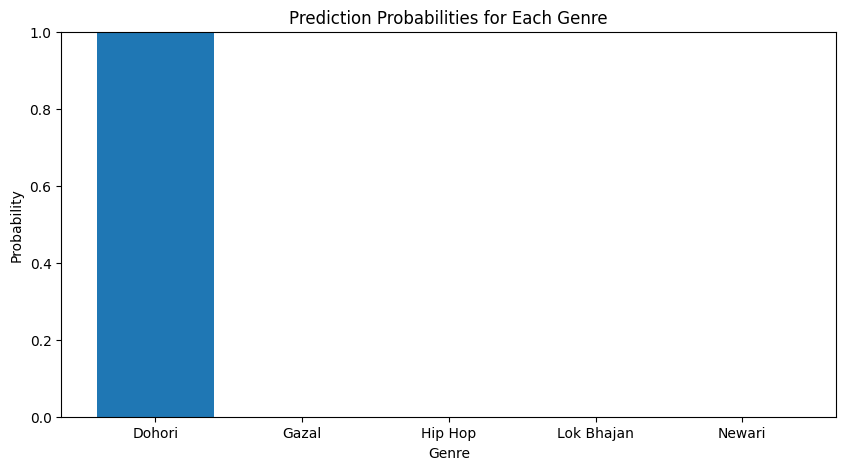

In [ ]:
import matplotlib.pyplot as plt

# Function to preprocess a single audio file for prediction
def preprocess_audio_for_prediction(file_path, target_shape=(150, 150)):
    # Load the audio file
    audio_data, sample_rate = librosa.load(file_path, sr=None)

    # Generate Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

    # Resize the Mel Spectrogram to the target shape
    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)

    # Expand dimensions to match the model's input shape (batch_size, height, width, channels)
    mel_spectrogram = np.expand_dims(mel_spectrogram.numpy(), axis=0)

    return mel_spectrogram

# Path to the new audio file for prediction
new_audio_path = "/content/drive/MyDrive/New_indexes_mp3/Dohori_103.mp3"

# Preprocess the new audio file
preprocessed_audio = preprocess_audio_for_prediction(new_audio_path)

# Make a prediction
predictions = model.predict(preprocessed_audio)

# Get the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class = classes[predicted_class_index]

# Print the predicted genre
print(f"Predicted Genre: {predicted_class}")

# Print the prediction probabilities for all classes
print("\nPrediction Probabilities:")
for i, genre in enumerate(classes):
    print(f"{genre}: {predictions[0][i]:.4f}")

# Visualize the prediction probabilities
plt.figure(figsize=(10, 5))
plt.bar(classes, predictions[0])
plt.title("Prediction Probabilities for Each Genre")
plt.xlabel("Genre")
plt.ylabel("Probability")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for probabilities
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Genre: Hip Hop

Prediction Probabilities:
Dohori: 0.0000
Gazal: 0.0680
Hip Hop: 0.9207
Lok Bhajan: 0.0113
Newari: 0.0000


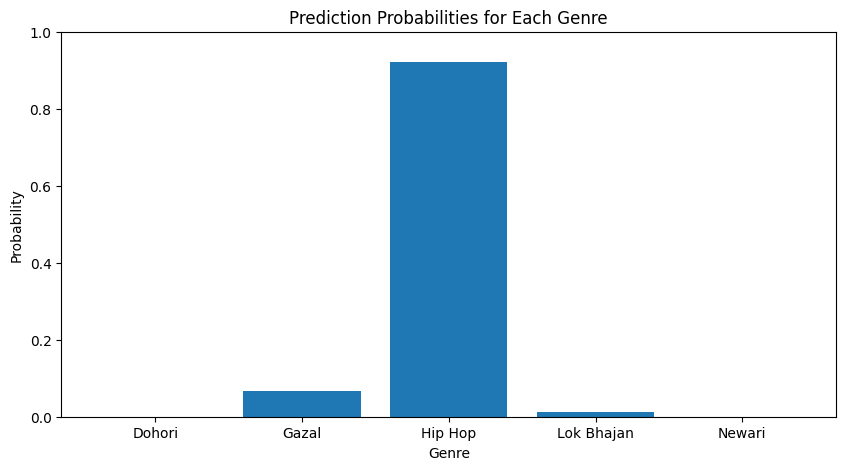

In [ ]:
import matplotlib.pyplot as plt

# Function to preprocess a single audio file for prediction
def preprocess_audio_for_prediction(file_path, target_shape=(150, 150)):
    # Load the audio file
    audio_data, sample_rate = librosa.load(file_path, sr=None)

    # Generate Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

    # Resize the Mel Spectrogram to the target shape
    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)

    # Expand dimensions to match the model's input shape (batch_size, height, width, channels)
    mel_spectrogram = np.expand_dims(mel_spectrogram.numpy(), axis=0)

    return mel_spectrogram

# Path to the new audio file for prediction
new_audio_path = "/content/MAYA HASEKO - Basanta Thapa  Shanti Shree  Pralhad Subedi Nepali Song 2077 Durgesh Thapa  Losina_part35.mp3"

# Preprocess the new audio file
preprocessed_audio = preprocess_audio_for_prediction(new_audio_path)

# Make a prediction
predictions = model.predict(preprocessed_audio)

# Get the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class = classes[predicted_class_index]

# Print the predicted genre
print(f"Predicted Genre: {predicted_class}")

# Print the prediction probabilities for all classes
print("\nPrediction Probabilities:")
for i, genre in enumerate(classes):
    print(f"{genre}: {predictions[0][i]:.4f}")

# Visualize the prediction probabilities
plt.figure(figsize=(10, 5))
plt.bar(classes, predictions[0])
plt.title("Prediction Probabilities for Each Genre")
plt.xlabel("Genre")
plt.ylabel("Probability")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for probabilities
plt.show()

In [ ]:
pip install pydub

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: Dohori
Prediction Probabilities: [[9.7979349e-01 2.2721398e-03 5.5185193e-04 4.7939231e-08 1.7382456e-02]]


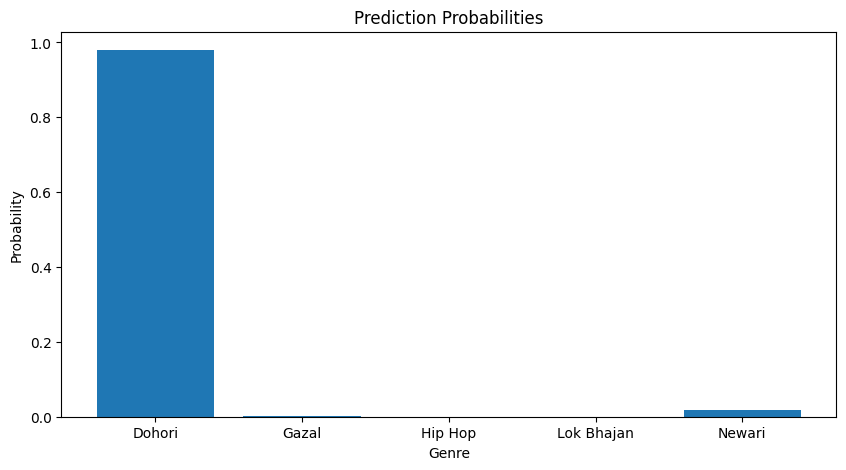

In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.image import resize
import matplotlib.pyplot as plt
from pydub import AudioSegment  # For trimming audio

# Function to trim a random 5-second portion from an audio file in memory
def trim_random_5_seconds(audio_data, sample_rate, duration=5):
    """
    Trims a random 5-second portion from an audio file in memory.
    :param audio_data: The raw audio data (numpy array).
    :param sample_rate: The sampling rate of the audio.
    :param duration: Duration of the trimmed portion in seconds (default: 5 seconds).
    :return: Trimmed audio data.
    """
    # Calculate the start time for the random 5-second portion
    max_start = max(0, len(audio_data) - duration * sample_rate)  # Ensure the start time is within bounds
    start_sample = np.random.randint(0, max_start)
    end_sample = start_sample + int(duration * sample_rate)

    # Trim the audio
    trimmed_audio = audio_data[start_sample:end_sample]

    return trimmed_audio

# Function to preprocess a single audio file for prediction
def preprocess_audio_for_prediction(audio_data, sample_rate, target_shape=(150, 150)):
    """
    Preprocesses an audio file for prediction by generating a Mel spectrogram.
    :param audio_data: The raw audio data (numpy array).
    :param sample_rate: The sampling rate of the audio.
    :param target_shape: Target shape for the Mel spectrogram (default: (150, 150)).
    :return: Preprocessed Mel spectrogram.
    """
    # Generate Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)

    # Resize the Mel Spectrogram to the target shape
    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)

    # Expand dimensions to match the model's input shape (batch_size, height, width, channels)
    mel_spectrogram = np.expand_dims(mel_spectrogram.numpy(), axis=0)

    return mel_spectrogram

# Function to plot the prediction probabilities
def plot_prediction_probabilities(predictions, classes):
    """
    Plots the prediction probabilities as a bar chart.
    :param predictions: Prediction probabilities from the model.
    :param classes: List of class names.
    """
    plt.figure(figsize=(10, 5))
    plt.bar(classes, predictions[0])
    plt.xlabel("Genre")
    plt.ylabel("Probability")
    plt.title("Prediction Probabilities")
    plt.show()

# Path to the new audio file for prediction
input_audio_path = "/content/Man Pareko Manchhe  Khem Century & Bina Budha Magar  Ft. Anjali Adhikari New Lok Dohori Song 2078.mp3"

# Load the audio file
audio_data, sample_rate = librosa.load(input_audio_path, sr=None)

# Trim a random 5-second portion from the audio file
trimmed_audio = trim_random_5_seconds(audio_data, sample_rate)

# Preprocess the trimmed audio file
preprocessed_audio = preprocess_audio_for_prediction(trimmed_audio, sample_rate)

# Make a prediction
predictions = model.predict(preprocessed_audio)

# Get the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class = classes[predicted_class_index]

# Print the prediction
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predictions}")

# Plot the prediction probabilities
plot_prediction_probabilities(predictions, classes)